In [4]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import json
from shapely import geometry as sgeom

In [32]:
########## USER ###########
# Select modeling domain ('WY', 'UT', 'OR', 'WA')
domain = 'WA'

In [33]:
#CSO data path
CSOpath = 'cso-data.geojson'

#path to CSO domain json
with open('../CSO_domains.json') as f:
    domains = json.load(f)

#start date    
st = domains[domain]['st']
#end date
ed = domains[domain]['ed']

#Snotel bounding box
Bbox = domains[domain]['Bbox']

# CSO projection
stn_proj = domains[domain]['stn_proj']

In [34]:
gdf = gpd.read_file(CSOpath)

In [35]:
# Convert the bounding box dictionary to a shapely Polygon geometry using sgeom.box
box_sgeom = sgeom.box(Bbox['lonmin'], Bbox['latmin'], Bbox['lonmax'], Bbox['latmax'])
box_gdf = gpd.GeoDataFrame(geometry=[box_sgeom], crs=stn_proj)

In [38]:
CSO_gdf = gpd.sjoin(gdf, box_gdf, how="inner")
CSO_gdf.drop(columns='index_right', inplace=True)
CSO_gdf.reset_index(drop=True, inplace=True)
CSO_gdf.head()

,id,author,depth,source,timestamp,elevation,_ms,geometry
0,0FIbt71c,Bob Sutherland,61.999998,MountainHub,2020-01-05T20:04:08,980.924622,1578254648880,POINT (-120.51831 48.59405)
1,0T3SEQNz,Yasmine Hentati,27.000000,MountainHub,2020-01-14T19:57:54,1051.207520,1579031874034,POINT (-120.15264 48.30681)
2,1OaGvegg,Bob Sutherland,60.959999,MountainHub,2019-01-05T20:44:26,1155.734619,1546721066939,POINT (-120.32428 48.58304)
3,1xmy9hHt,Bob Sutherland,109.999996,MountainHub,2020-01-30T19:48:48,900.381226,1580413728183,POINT (-120.56573 48.64941)
4,20OQ9cvy,David Hill,35.000000,MountainHub,2020-01-03T16:58:12,1234.039551,1578070692193,POINT (-120.29480 48.56598)


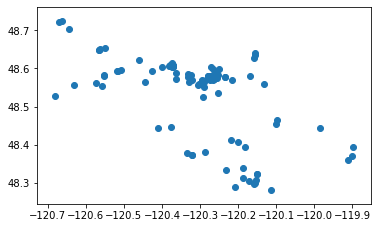

In [37]:
CSO_gdf.plot()